In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Data Collection and analysis

diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 
0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [10]:
## Now Scale our Data

from sklearn.preprocessing import StandardScaler

In [11]:
scale = StandardScaler()

In [12]:
stand_scaler = scale.fit_transform(X)

In [13]:
stand_scaler

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
X = stand_scaler
y = diabetes_dataset['Outcome']

In [15]:
print(X,y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
## Now split into train test data

from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 42)

In [18]:
len(X_train)

691

In [19]:
X_train

array([[-0.25095213, -0.77912776, -0.67752325, ..., -0.92556851,
         1.4258696 ,  0.49003012],
       [-1.14185152, -0.12188771, -0.16054575, ..., -0.15136112,
         0.06379607, -0.95646168],
       [ 0.04601433, -0.34096773,  1.18359575, ...,  0.71168975,
        -0.84827977, -0.27575966],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

## Now train our data by SVM Classifier

In [20]:
from sklearn.svm import SVC

In [21]:
classifier = SVC(kernel= 'linear', C = 1000)

In [22]:
classifier.fit(X_train,y_train)

SVC(C=1000, kernel='linear')

### Now Model Evalution 


In [23]:
pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        50
           1       0.58      0.67      0.62        27

    accuracy                           0.71        77
   macro avg       0.69      0.70      0.70        77
weighted avg       0.73      0.71      0.72        77



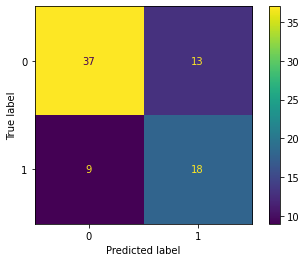

In [26]:
plot_confusion_matrix(classifier,X_test,y_test)

### Making a Predictive System

In [27]:
input_data = (7,100,0,0,0,30,0.484,32)

## Change input into numpy array

input_data_as_numpy_array = np.asarray(input_data)


## Reshape data

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

## Standardize the input data

std_data = scale.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[ 0.93691372 -0.65393918 -3.57259724 -1.28821221 -0.69289057 -0.25289651
   0.03661501 -0.10558415]]
[0]


In [28]:
if (prediction[0] == 0):
    print('The Person is not Diabitic')
else:
    print('The Person is Diabitic')

The Person is not Diabitic


In [31]:
input_data = (5,166,72,19,175,25.8,0.587,51)

## Change input into numpy array

input_data_as_numpy_array = np.asarray(input_data)


## Reshape data

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

## Standardize the input data

std_data = scale.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]


In [32]:
if (prediction[0] == 0):
    print('The Person is not Diabitic')
else:
    print('The Person is Diabitic')

The Person is Diabitic
